# Homophobia and Misogyny in Hip Hop
*by Ankush Bharadwaj*

### Question
How has the use of homophobic and misogynistic slurs in rap and hip hop changed over the years?

## Web scrape albums

The first step is to web scrape the list of albums to use as our sample of popular rap and hip hop albums over time. To do this, the requests library will be used to generate a Response object that has all the needed information. Next, the Beautiful Soup library will help access the text data stored in our Response object to generate a DataFrame with the albums' name, year they charted, and artist. 

The albums scraped are from the following link: http://davesmusicdatabase.blogspot.com/2011/07/the-top-50-rap-albums-of-all-time.html. This list is an aggregation of more than 25 other lists, and therefore, it stands to reason that the albums included in this list are very popular albums that are indications of the genre's standard at the respective points in time the albums charted. 

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'http://davesmusicdatabase.blogspot.com/2011/07/the-top-50-rap-albums-of-all-time.html'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

albums = []
for data in soup.find_all('i'):
    albums.append(data.get_text())

albums = albums[2:]
albums[54] = albums[54].split(' ',1)[-1]

album_data = []
for data in soup.find_all('p'):
    album_data.append(data.get_text())

album_data = [i.split('\n') for i in album_data][2]
album_data = list(filter(None, album_data))
album_data = album_data[1:]

album_year = [i.strip().split('(')[-1].replace(')', '') for i in album_data]
album_year = [i.split(' ')[-1] for i in album_year]
album_year[album_year.index('3/15/15')] = '2015'
from datetime import datetime
album_year = [datetime.strptime(i, '%Y') for i in album_year]

album_artist = []
counter = 0
for i in album_data:
    album_name = albums[counter]
    artist_data = i[:i.find(album_name)]
    album_artist.append(artist_data)
    counter += 1
album_artist[57] = 'Run-D.M.C.'
album_artist[64] = 'Cypress Hill'
album_artist = [i.strip().split('. ',1)[-1] for i in album_artist]

Time to take a pause and make sure that the lengths of all of these lists that contain different information about the album are of the same length before using them to generate the DataFrame.

In [5]:
print('Album Names: {}\nAlbum Years: {}\nAlbum Artists: {}'.format(len(albums),len(album_year),len(album_artist)))

Album Names: 100
Album Years: 100
Album Artists: 100


In [6]:
albums_df = pd.DataFrame(columns = ['album_name', 'album_year'])
albums_df['album_name'] = albums
albums_df['album_year'] = album_year
albums_df['album_artist'] = album_artist

pd.set_option('display.max_rows', None)
albums_df

,album_name,album_year,album_artist
0,It Takes a Nation of Millions to Hold Us Back,1988-01-01,Public Enemy
1,The Marshall Mathers LP,2000-01-01,Eminem
2,The Miseducation of Lauryn Hill,1998-01-01,Lauryn Hill
3,The Eminem Show,2002-01-01,Eminem
4,Licensed to Ill,1986-01-01,Beastie Boys
5,Straight Outta Compton,1989-01-01,N.W.A.
6,Speakerboxxx/The Love Below,2003-01-01,OutKast
7,Paul’s Boutique,1989-01-01,Beastie Boys
8,3 Feet High and Rising,1989-01-01,De La Soul
9,Please Hammer Don’t Hurt ‘Em,1990-01-01,MC Hammer


Text(2000-01-01 00:00:00, 14, 'Mean: 1999-03-29 18:28:48')

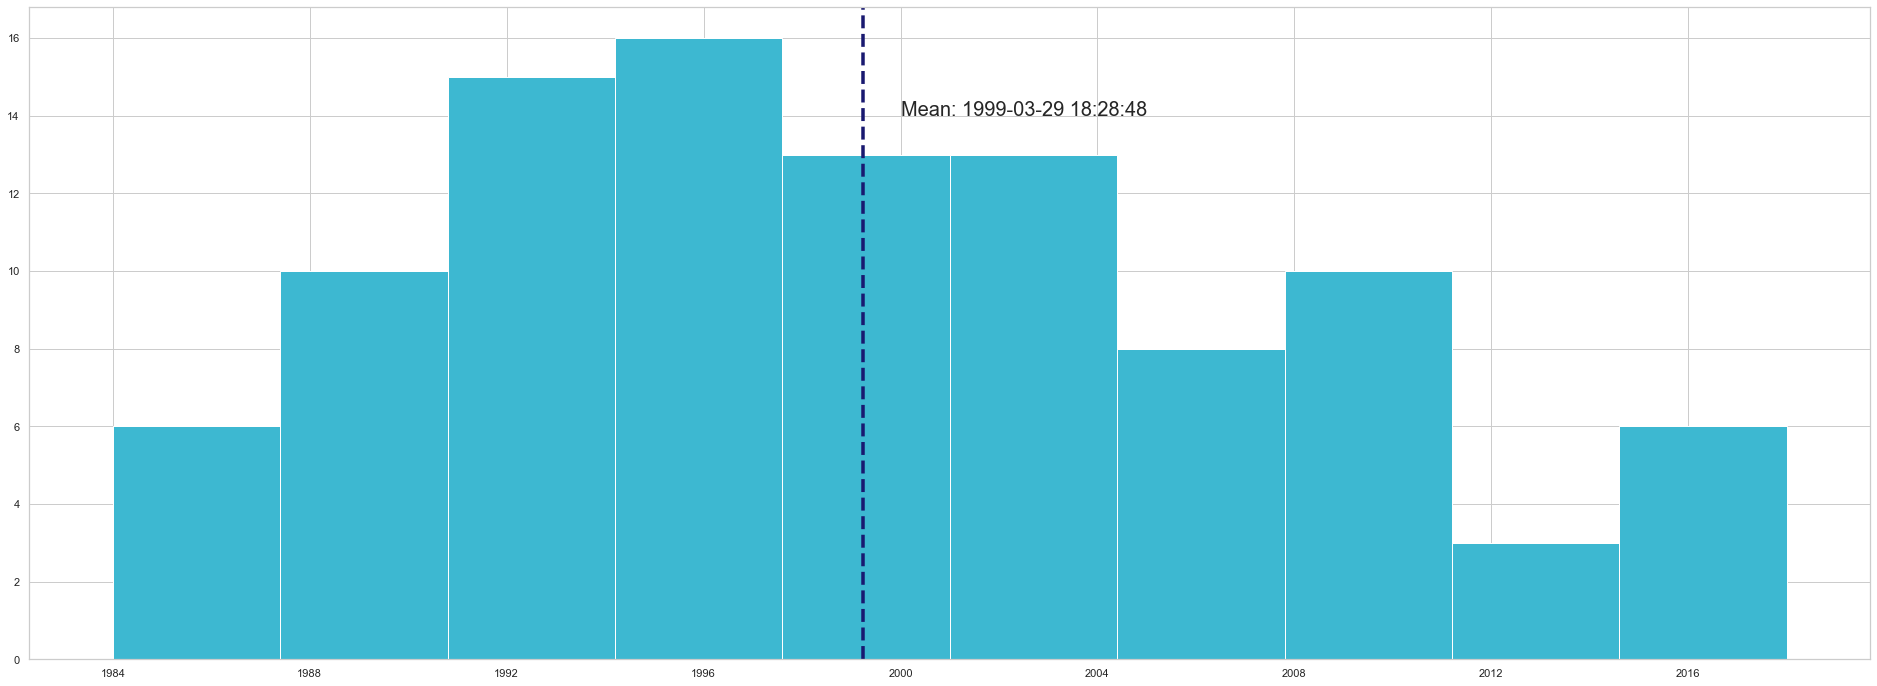

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(33, 12)})
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(1, h = .6, l = .7))

plt.hist(albums_df['album_year'])
plt.axvline(albums_df['album_year'].mean(), linestyle='dashed', linewidth = 3.5, color = 'midnightblue')
plt.text(datetime.strptime('2000', '%Y'),14, fontsize=20, s = 'Mean: {}'.format(albums_df['album_year'].mean()))

By visualizing the distribution of the years, it's possible to notice any inherent skew in the year each of the albums in our dataset charted. Although there is a slight right skew, with most of the albums falling left of the mean, I don't believe resampling is required, because I am not planning on using any machine learning model that assumes normally distributed data. However, this skew should be kept in mind when explaining the results.

## Acquire track list for each album

Next, the track list for each of the albums must be acquired. Once again, the same process as before will be utilized to scrape the track list for each album by accessing genius.com. The requests library will be used to store information from each URL in a Response object, which will then be worked on via the Beautiful Soup library to add track lists to each of the albums in the DataFrame. 

To acquire the track list for each album as efficiently as possible, a loop that accesses one album's tracklist at a time will be constructred. Each iteration of the loop, the URL will need to be altered depending on the album and artist. However, if the resulting tracklist comes out empty, this means that something went wrong with the automatic URL formatting, in which case the list will indicate an error at that location. After the loop is done running, locations at which an error is found would require manual URL input to access the tracklist.

In [16]:
url = 'https://genius.com/albums/{}/{}'
all_tracklists = []

for i in range(0,len(albums_df)):
    current_album = albums_df.iloc[i]['album_name'].replace(' ','-')
    current_artist = albums_df.iloc[i]['album_artist'].replace(' ','-')
    
    page = requests.get(url.format(current_artist, current_album))
    soup = BeautifulSoup(page.text, 'html.parser')
    
    current_tracklist = []
    
    songs = soup.find_all('h3', attrs = {'class': 'chart_row-content-title'})
    for song in songs:
        current_tracklist.append(song.get_text())
    
    if len(current_tracklist) != 0:
        current_tracklist = [i.replace('\n','').replace('Lyrics','').strip() for i in current_tracklist]
        all_tracklists.append(current_tracklist)
    else:
        all_tracklists.append(['Error at: {}, {}'.format(current_album, current_artist)])

From here, after looking at the list of tracklists that resulted in an error, the list of replacement URLs that weren't caught by the pattern can be compiled. Afterwards, a dictionary that links the error message in the overall tracklist list object to the new URL used to access the tracklist for the linked album will be constructed. Then, the overall tracklist list object will be modified to include the tracklists for the albums that were missed.

In [36]:
error_tracklists = []
for i in all_tracklists:
    if len(i) == 1:
        error_tracklists.append(i[0])
        
error_tracklists = {key: None for key in error_tracklists}
error_tracklists

{'Error at: Straight-Outta-Compton, N.W.A.': None,
 'Error at: Speakerboxxx/The-Love-Below, OutKast': None,
 'Error at: Paul’s-Boutique, Beastie-Boys': None,
 'Error at: Please-Hammer-Don’t-Hurt-‘Em, MC-Hammer': None,
 'Error at: The-Chronic, Dr.-Dre': None,
 'Error at: Endtroducing…, DJ-Shadow': None,
 'Error at: The-Score, The-Fugees': None,
 'Error at: Get-Rich-Or-Die-Tryin’, 50-Cent': None,
 'Error at: Curtain-Call:-The-Hits, Eminem:': None,
 'Error at: Damn., Kendrick-Lamar:': None,
 'Error at: Enter-the-Wu-Tang-(36-Chambers), Wu-Tang-Clan': None,
 'Error at: Raising-Hell, Run-D.M.C.': None,
 'Error at: Paid-in-Full, Eric-B.-&-Rakim': None,
 'Error at: Doggystyle, Snoop-Doggy-Dogg': None,
 'Error at: To-Pimp-a-Butterfly, Kendrick-Lamar:': None,
 'Error at: Ready-to-Die, The-Notorious-B.I.G.': None,
 'Error at: My-Beautiful-Dark-Twisted-Fantasy, Kanye-West:': None,
 'Error at: Life-after-Death, The-Notorious-B.I.G.': None,
 'Error at: 8-Mile, Eminem/various-artists': None,
 'Error 

In [54]:
error_new_url = ['https://genius.com/albums/Nwa/Straight-outta-compton',
                'https://genius.com/albums/Outkast/Speakerboxxx-the-love-below',
                'https://genius.com/albums/Beastie-boys/Paul-s-boutique',
                'https://genius.com/albums/Mc-hammer/Please-hammer-don-t-hurt-em',
                'https://genius.com/albums/Dr-dre/The-chronic',
                'https://genius.com/albums/Dj-shadow/Endtroducing',
                'https://genius.com/albums/Fugees/The-score',
                'https://genius.com/albums/50-cent/Get-rich-or-die-tryin',
                'https://genius.com/albums/Eminem/Curtain-call-the-hits-deluxe-version',
                'https://genius.com/albums/Kendrick-lamar/Damn',
                'https://genius.com/albums/Wu-tang-clan/Enter-the-wu-tang-36-chambers',
                'https://genius.com/albums/Run-dmc/Raising-hell',
                'https://genius.com/albums/Eric-b-and-rakim/Paid-in-full',
                'https://genius.com/albums/Snoop-dogg/Doggystyle',
                'https://genius.com/albums/Kendrick-lamar/To-pimp-a-butterfly',
                'https://genius.com/albums/The-notorious-big/Ready-to-die',
                'https://genius.com/albums/Kanye-west/My-beautiful-dark-twisted-fantasy',
                'https://genius.com/albums/The-notorious-big/Life-after-death',
                'https://genius.com/albums/Shady-records/8-mile-music-from-and-inspired-by-the-motion-picture',
                'https://genius.com/albums/Kendrick-lamar/Good-kid-m-a-a-d-city',
                'https://genius.com/albums/Arrested-development/3-years-5-months-and-2-days-in-the-life-of',
                'https://genius.com/albums/Dr-dre/2001',
                'https://genius.com/albums/A-tribe-called-quest/Peoples-instinctive-travels-and-the-paths-of-rhythm',
                'https://genius.com/albums/Run-dmc/Run-d-m-c',
                'https://genius.com/albums/Drake/If-youre-reading-this-its-too-late',
                'https://genius.com/albums/Diddy/No-way-out',
                'https://genius.com/albums/Jay-z/Vol-2-hard-knock-life',
                'https://genius.com/albums/Post-malone/Beerbongs-bentleys',
                'https://genius.com/albums/Jay-z-and-kanye-west/Watch-the-throne',
                'https://genius.com/albums/Nicki-minaj/Pink-friday-roman-reloaded',
                'https://genius.com/albums/Missy-elliott/Supa-dupa-fly',
                'https://genius.com/albums/Ice-cube/Amerikkkas-most-wanted',
                'https://genius.com/albums/Dmx/Its-dark-and-hell-is-hot',
                'https://genius.com/albums/Bone-thugs-n-harmony/E-1999-eternal',
                'https://genius.com/albums/Ti/King',
                'https://genius.com/albums/Dj-jazzy-jeff-and-the-fresh-prince/Hes-the-dj-im-the-rapper',
                'https://genius.com/albums/Ti/Paper-trail',
                'https://genius.com/albums/Kanye-west/808s-heartbreak',
                'https://genius.com/albums/2pac/The-don-killuminati-the-7-day-theory',
                'https://genius.com/albums/Raekwon/Only-built-4-cuban-linx',
                'https://genius.com/albums/Gza/Liquid-swords']

counter = 0
for i in error_tracklists:
    error_tracklists[i] = error_new_url[counter]
    counter+=1

It's time to fix the incorrect tracklists.

In [51]:
for i in error_tracklists:
    url = error_tracklists[i]
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    current_tracklist = []
    
    songs = soup.find_all('h3', attrs = {'class': 'chart_row-content-title'})
    for song in songs:
        current_tracklist.append(song.get_text())
    
    if len(current_tracklist) != 0:
        current_tracklist = [i.replace('\n','').replace('Lyrics','').strip() for i in current_tracklist]
        all_tracklists[all_tracklists.index([i])] = current_tracklist

Now, just to make sure that there aren't any remaining incorrect tracklists and ensure that the overall list of tracklists has the same length as the overall DataFrame. 

In [57]:
for i in all_tracklists:
    if len(i) == 1:
        print(i)
print(len(all_tracklists))

100


And finally, the tracklists need to be added to the overall DataFrame.

In [58]:
albums_df['album_tracklist'] = all_tracklists
albums_df

,album_name,album_year,album_artist,album_tracklist
0,It Takes a Nation of Millions to Hold Us Back,1988-01-01,Public Enemy,"[Countdown to Armageddon, Bring the Noise, Don..."
1,The Marshall Mathers LP,2000-01-01,Eminem,[Public Service Announcement 2000 (Ft. Jeff Ba...
2,The Miseducation of Lauryn Hill,1998-01-01,Lauryn Hill,"[Intro, Lost Ones, Ex-Factor, To Zion (Ft. Car..."
3,The Eminem Show,2002-01-01,Eminem,"[Curtains Up (Skit) [2002], White America, Bus..."
4,Licensed to Ill,1986-01-01,Beastie Boys,"[Rhymin & Stealin, The New Style (Ft. DJ Hurri..."
5,Straight Outta Compton,1989-01-01,N.W.A.,"[Straight Outta Compton, Fuck tha Police, Gang..."
6,Speakerboxxx/The Love Below,2003-01-01,OutKast,"[Intro (Speakerboxxx) by Big Boi, GhettoMusick..."
7,Paul’s Boutique,1989-01-01,Beastie Boys,"[To All the Girls, Shake Your Rump, Johnny Rya..."
8,3 Feet High and Rising,1989-01-01,De La Soul,"[Intro, The Magic Number, Change in Speak, Coo..."
9,Please Hammer Don’t Hurt ‘Em,1990-01-01,MC Hammer,"[Here Comes the Hammer, U Can't Touch This, Ha..."


## Establish corpus of lyrics

Now that the overall DataFrame has each album name, the album's release date, the album's artist, and the album's tracklist, it's time to put together the lyrics for each album and establish a corpus of lyrics. In this context, the corpus would be all of the lyrics from each track in each album in the DataFrame. However, establishing the corpus of lyrics must be done such that the lyrics from each song in each album can still be selected easily, as this differentiation is crucial to the text analysis. 

To access the lyrics from each song in an album, azlyrics.com will be used. A loop will cycle through each of the albums in the DataFrame and each song in the album, formatting the URL to pull lyrics for that specific song. The lyrics for each song in an album will be combined into a list, where each element of the list is a string that includes all the lyrics for each song in the album. The list of lyrics for songs in an album will be added to a growing list of list of lyrics for songs in each album in the DataFrame, which will finally be added into the DataFrame. Similar error detection methods as before will be employed. 

In [108]:
import string

url = 'https://www.azlyrics.com/lyrics/{}/{}.html'
punct = str.maketrans('', '', string.punctuation)
space = str.maketrans('', '', ' ')

album_lyrics = []
list_of_errors = []

for album in range(0, len(albums_df)):
    artist_str = albums_df.iloc[album]['album_artist'].translate(punct).translate(space).lower()
    current_album = []
    print('Index: {}'.format(album))
    
    for song in albums_df.iloc[album]['album_tracklist']:
        print('Song: {}'.format(song))
        try:
            song_str = song.translate(punct).translate(space).lower()

            page = requests.get(url.format(artist_str,song_str))
            soup = BeautifulSoup(page.text, 'html.parser')
            lyrics = soup.find_all('div')
            current_song = []
            for lyric in lyrics:
                current_song.append(lyric.get_text())

            good_to_proceed = False
            for words in current_song:
                if song.lower() in words.lower():
                    current_song = current_song[current_song.index(words)]
                    good_to_proceed = True
                    break

            if good_to_proceed:
                current_song = current_song.replace('\n', ' ')
                current_song = current_song.translate(punct).strip().lower()
                current_song = current_song[current_song.index(song.translate(punct).lower()):]
                current_song = current_song[:current_song.index('\r if   android')]
                current_album.append(current_song)
            else:
                current_album.append('Error: {}, {}'.format(album, song))
                list_of_errors.append('Error: {}, {}'.format(album, song))
        except:
            current_album.append('Error: {}, {}'.format(album, song))
            list_of_errors.append('Error: {}, {}'.format(album, song))
            pass
    
    print('-------------------------')
    album_lyrics.append(current_album)

Index: 0
Song: Countdown to Armageddon
Song: Bring the Noise
Song: Don't Believe the Hype
Song: Cold Lampin' with Flavor
Song: Terminator X to the Edge of Panic
Song: Mind Terrorist
Song: Louder than a Bomb
Song: Caught, Can We Get a Witness?
Song: Show 'Em Whatcha Got
Song: She Watch Channel Zero?!
Song: Night of the Living Baseheads
Song: Black Steel in the Hour of Chaos
Song: Security of the First World
Song: Rebel Without a Pause
Song: Prophets of Rage
Song: Party for Your Right to Fight
-------------------------
Index: 1
Song: Public Service Announcement 2000 (Ft. Jeff Bass)
Song: Kill You
Song: Stan (Ft. Dido)
Song: Paul (Skit) [2000] (Ft. Paul Rosenberg)
Song: Who Knew
Song: Steve Berman (Skit) [2000] (Ft. Steve Berman)
Song: The Way I Am
Song: The Real Slim Shady
Song: Remember Me? (Ft. RBX & Sticky Fingaz)
Song: I’m Back
Song: Marshall Mathers
Song: Ken Kaniff (Skit) [2000]
Song: Drug Ballad (Ft. Dina Rae)
Song: Amityville (Ft. Bizarre)
Song: Bitch Please II (Ft. Dr. Dre, Nate

Song: Fu-Gee-La (Sly & Robbie Remix) (Ft. Akon & John Forté)
Song: Mista Mista
Song: Chinese Restaurant Skit
-------------------------
Index: 13
Song: Intro
Song: We Don't Care
Song: Graduation Day
Song: All Falls Down (Ft. Syleena Johnson)
Song: I'll Fly Away
Song: Spaceship (Ft. Consequence & GLC)
Song: Jesus Walks
Song: Never Let Me Down (Ft. JAY-Z & J. Ivy)
Song: Get Em High (Ft. Common & Talib Kweli)
Song: Workout Plan
Song: The New Workout Plan
Song: Slow Jamz by Twista, Kanye West & Jamie Foxx
Song: Breathe In Breathe Out (Ft. Ludacris)
Song: School Spirit (Skit 1)
Song: School Spirit
Song: School Spirit (Skit 2)
Song: Lil' Jimmy (Skit)
Song: Two Words (Ft. The Boys Choir of Harlem, Freeway & Yasiin Bey)
Song: Through the Wire
Song: Family Business
Song: Last Call
Song: The College Dropout [Booklet]
-------------------------
Index: 14
Song: The Ruler's Back
Song: Takeover
Song: Izzo (H.O.V.A.)
Song: Girls, Girls, Girls
Song: Jigga That Nigga
Song: U Don't Know
Song: Hola' Hovito

-------------------------
Index: 28
Song: Bathtub
Song: G Funk Intro (Ft. The Lady of Rage)
Song: Gin and Juice
Song: W Balls (Ft. The Queen of Funk & Ricky Harris)
Song: Tha Shiznit (Ft. Lil David Ruffin)
Song: House Party (Ft. Daz Dillinger & Dr. Dre)
Song: Lodi Dodi (Ft. Nanci Fletcher)
Song: Murder Was the Case (Death After Visualizing Eternity) (Ft. Daz Dillinger)
Song: Serial Killa (Ft. Tha Dogg Pound, RBX & ​The D.O.C.)
Song: Who Am I (What's My Name)? (Ft. Dr. Dre)
Song: For All My Niggaz & Bitches (Ft. Tha Dogg Pound & The Lady of Rage)
Song: Ain't No Fun (If the Homies Can't Have None) (Ft. Kurupt, Nate Dogg & Warren G)
Song: Chronic Break
Song: Doggy Dogg World (Ft. Tha Dogg Pound, The Dramatics & Nanci Fletcher)
Song: Class Room Intro (Ft. Bow Wow)
Song: Gz and Hustlas (Ft. Nanci Fletcher)
Song: Checkin (Ft. Sam Sneed)
Song: Gz Up, Hoes Down (Ft. Hug)
Song: Pump Pump (Ft. Mr. Malik (Rap))
-------------------------
Index: 29
Song: Wesley's Theory (Ft. George Clinton & Thunde

-------------------------
Index: 40
Song: Curtains Up (Skit) [2004]
Song: Evil Deeds
Song: Never Enough (Ft. 50 Cent & Nate Dogg)
Song: Yellow Brick Road
Song: Like Toy Soldiers
Song: Mosh
Song: Puke
Song: My 1st Single
Song: Paul (Skit) [2004] (Ft. Paul Rosenberg)
Song: Rain Man
Song: Big Weenie
Song: Em Calls Paul (Skit) [2004]
Song: Just Lose It
Song: Ass Like That
Song: Spend Some Time (Ft. 50 Cent, Obie Trice & Stat Quo)
Song: Mockingbird
Song: Crazy in Love
Song: One Shot 2 Shot (Ft. D12)
Song: Final Thought (Skit)
Song: Encore / Curtains Down (Ft. 50 Cent & Dr. Dre)
Song: We As Americans
Song: Love You More
Song: Ricky Ticky Toc
-------------------------
Index: 41
Song: Pump It
Song: Don't Phunk with My Heart
Song: My Style (Ft. Justin Timberlake)
Song: Don't Lie
Song: My Humps
Song: Like That (Ft. CeeLo Green, John Legend, Q-Tip & Talib Kweli)
Song: Dum Diddly (Ft. Dante Santiago)
Song: Feel It
Song: Gone Going (Ft. Jack Johnson)
Song: They Don't Want Music (Ft. James Brown)
So

Song: Y'All Scared (Ft. Big Gipp, Khujo Goodie & T-Mo)
Song: Nathaniel (Ft. Nathaniel)
Song: Liberation (Ft. Big Rube, CeeLo Green & Erykah Badu)
Song: Chonkyfire
Song: Aquemini [Credits]
-------------------------
Index: 54
Song: Push It Along
Song: Luck of Lucien (Ft. Papalu)
Song: After Hours
Song: Footprints
Song: I Left My Wallet in El Segundo
Song: Pubic Enemy (Ft. Kool DJ Red Alert)
Song: Bonita Applebum
Song: Can I Kick It?
Song: Youthful Expression
Song: Rhythm (Devoted to the Art of Moving Butts)
Song: Mr. Muhammad
Song: Ham 'N' Eggs
Song: Go Ahead in the Rain
Song: Description of a Fool
-------------------------
Index: 55
Song: Dr. West (Skit) (Ft. Dominic West)
Song: 3 a.m.
Song: My Mom
Song: Insane
Song: Bagpipes from Baghdad
Song: Hello
Song: Tonya (Skit)
Song: Same Song & Dance
Song: We Made You
Song: Medicine Ball
Song: Paul (Skit) [2009]
Song: Stay Wide Awake
Song: Old Time's Sake (Ft. Dr. Dre)
Song: Must Be the Ganja
Song: Mr. Mathers (Skit)
Song: Déjà Vu
Song: Beautif

Song: Strange Ways
Song: Fancy Clown (Ft. Viktor Vaughn)
Song: Eye (Ft. Stacy Epps)
Song: Supervillain Theme
Song: All Caps
Song: Great Day
Song: Rhinestone Cowboy
-------------------------
Index: 69
Song: Intro - Hand It Down (Ft. Memphis Bleek & Pain In Da Ass)
Song: Hard Knock Life (Ghetto Anthem)
Song: If I Should Die (Ft. Da Ranjahz)
Song: Ride or Die
Song: Nigga What, Nigga Who (Originator '99) (Ft. Amil & Jaz-O)
Song: Money, Cash, Hoes (Ft. DMX)
Song: A Week Ago (Ft. Too $hort)
Song: Coming of Age (Da Sequel) (Ft. Memphis Bleek)
Song: Can I Get A… (Ft. Amil & Ja Rule)
Song: Paper Chase (Ft. Foxy Brown)
Song: Reservoir Dogs (Ft. Beanie Sigel, The LOX & Sauce Money)
Song: It's Like That
Song: It's Alright (Ft. Memphis Bleek)
Song: Money Ain't a Thang by Jermaine Dupri (Ft. JAY-Z)
-------------------------
Index: 70
Song: Paranoid
Song: Spoil My Night (Ft. Swae Lee)
Song: Rich & Sad
Song: Zack and Codeine
Song: Takin' Shots
Song: ​​rockstar (Ft. 21 Savage)
Song: Over Now
Song: Psyc

Song: Just Like U
Song: I'll Be Damned
Song: Dude (Skit)
Song: My Band
Song: U R the One
Song: 6 in the Morning (Come On In)
Song: How Come
Song: Leave Dat Boy Alone
Song: Get My Gun
Song: Bizarre (Skit) [2004]
Song: Bitch
Song: Steve's Coffee House
Song: D12 World
Song: 40 Oz.
Song: Commercial Break (Ft. Young Zee)
Song: American Psycho II (Ft. B-Real)
Song: Bugz '97
Song: Good Die Young
Song: Keep Talkin'
Song: Barbershop
Song: Slow Your Roll
-------------------------
Index: 85
Song: 56 Bars (Intro)
Song: I'm Illy
Song: Ready for Whatever
Song: On Top of the World (Ft. B.o.B & Ludacris)
Song: Live Your Life (Ft. Rihanna)
Song: Whatever You Like
Song: No Matter What
Song: My Life Your Entertainment (Ft. Usher)
Song: Porn Star
Song: Swing Ya Rag (Ft. Swizz Beatz)
Song: What Up, What's Haapnin'
Song: Every Chance I Get
Song: Swagga Like Us by JAY-Z & T.I. (Ft. Kanye West & Lil Wayne)
Song: Slide Show (Ft. John Legend)
Song: You Ain't Missin' Nothin'
Song: Dead and Gone (Ft. Justin Timbe

Song: Get Off the Bandwagon
Song: D.J. K La Boss
Song: Jane
Song: I'm Housin' [U.K. Mix]
Song: You Gots to Chill [Dub Version]
Song: You Gots to Chill [Percapella]
Song: You're a Customer [Dub Version]
Song: It's My Thing [Dub Version]
Song: Strictly Business (Original Recording)
Song: Strictly Business (Credits)
-------------------------
Index: 99
Song: Fear Not of Man
Song: Hip Hop
Song: Love
Song: Ms. Fat Booty
Song: Speed Law
Song: Do It Now (Ft. Busta Rhymes)
Song: Got
Song: UMI Says
Song: New World Water
Song: Rock N Roll
Song: Know That (Ft. Talib Kweli)
Song: Climb (Ft. Vinia Mojica)
Song: Brooklyn
Song: Habitat
Song: Mr. Nigga (Ft. Q-Tip)
Song: Mathematics
Song: May-December
Song: Black on Both Sides [Credits]
-------------------------


In [109]:
print(len(list_of_errors))
    

1832


## Text Analysis

## Visualizations